In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [2]:
#reading the dataset
seoulbike = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1') 
seoulbike 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
#converting the date column to datetime format
seoulbike['Date'] = pd.to_datetime(seoulbike['Date'], format='%d/%m/%Y')

#extracting components from the date
seoulbike['Day'] = seoulbike['Date'].dt.day
seoulbike['Month'] = seoulbike['Date'].dt.month
seoulbike['Year'] = seoulbike['Date'].dt.year
seoulbike['Day of the Week'] = seoulbike['Date'].dt.dayofweek

#dropping the original date column
seoulbike = seoulbike.drop(columns=['Date'])

#re-encoding categorical columns and proceed with feature selection
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons'])
feature_cols = [col for col in seoulbike_encoded.columns if col != 'Rented Bike Count']
X = seoulbike_encoded[feature_cols]
y = seoulbike['Rented Bike Count'] 

#run this section ONLY ONCE *AFTER* you have ran the section above this. it only works once. i don't know why :)

In [4]:
#dropping the Functioning Day column as it is not needed (it also caused some errors)
seoulbike = seoulbike.drop(columns=['Functioning Day'])
seoulbike  

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Day of the Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4


In [5]:
#applying one-hot encoding to both categorical columns
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons']) 
seoulbike 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Day of the Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,30,11,2018,4


In [6]:
#printing columns to see all available columns after encoding
print(seoulbike_encoded.columns) 

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year', 'Day of the Week', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')


In [7]:
#converting categorical columns to numerical using one-hot encoding
seoulbike_encoded = pd.get_dummies(seoulbike, columns=['Holiday', 'Seasons'], drop_first=True)
feature_cols = [col for col in seoulbike_encoded.columns if col != 'rentals'] 

In [8]:
#defining features and target
X = seoulbike_encoded[feature_cols]
y = seoulbike['Rented Bike Count']  

In [9]:
#  GRID SEARCH

#train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initializing and fitting the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)

#making predictions
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Score:", r2) 

Mean Squared Error: 21.36638684586254
R Squared Score: 0.9999487181572468


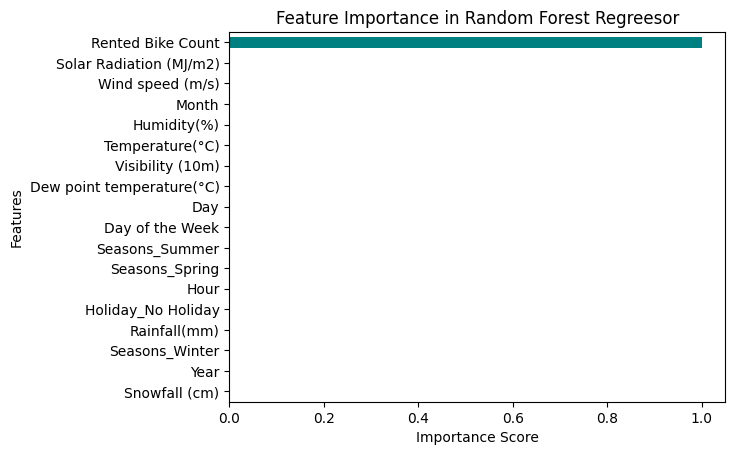

In [10]:
#understanding feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance in Random Forest Regreesor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [11]:
#Hyperparameter Tuning
#defining the parameter grid

param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth': [10, 15 ,20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 2, 4]
}

#initializing Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

#fitting the grid search into the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_) 

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [12]:
# RANDOM FOREST REGRESSOR

#train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initializing and fitting the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=10, random_state=42)

In [13]:
#making predictions
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared Score:", r2) 

Mean Squared Error: 21.36638684586254
R Squared Score: 0.9999487181572468


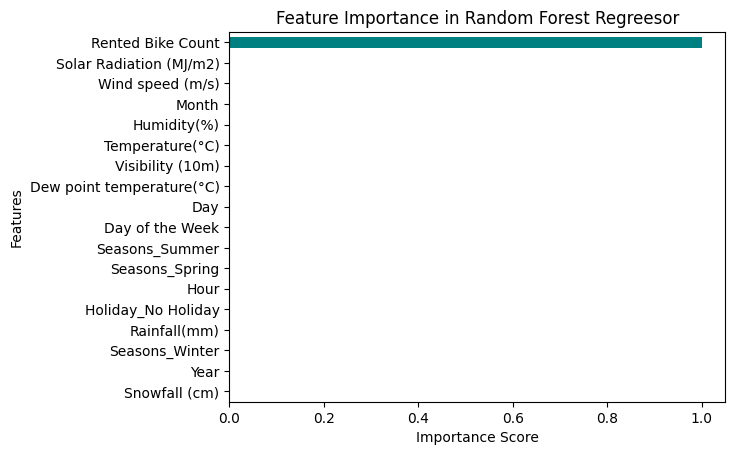

In [14]:
#understanding feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance in Random Forest Regreesor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()  

In [15]:
#Hyperparameter Tuning
#defining the parameter grid

#initializing RandomizedSearchCV with 3-fold CV and parallel processing

param_grid = {
    'n_estimators':[50, 100, 150],
    'max_depth': [10, 15 ,20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions = param_grid, 
    n_iter=40,
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
) 

In [16]:
#fitting the model
random_search.fit(X_train, y_train) 

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 20],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [17]:
# GRADIENT BOOSTING REGRESSOR

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42) 

In [18]:
#defining the paraneter grid for tuning 
param_grid = {
    'n_estimators': [50, 100, 150], 
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}  

In [19]:
#performing Hyperparameter Tuning
#using RandomSearcgCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions = param_grid,
    n_iter = 30,
    cv = 3,
    scoring = 'neg_mean_squared_error',
    verbose = 2,
    n_jobs = -1,
    random_state = 42 
) 

In [20]:
#fitting the model
random_search.fit(X_train, y_train)

#getting best parameters and model
best_params = random_search.best_params_

print("Best Parameters:", best_params)

best_model = random_search.best_estimator_ 

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05}


In [21]:
#evaluating the model on the test set
#making predictions
y_pred = best_model.predict(X_test)

#calculating the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("Mean Absolute Error:", mae)
print("R Squared Score:", r2)  

Mean Absolute Error: 0.44147974496165543
R Squared Score: 0.9999577962710283


In [22]:
#MODEL COMPARISON AND ANALYSIS
#Comparing Perfomance Metrics (MAE, MSE, R Squared)
#relevant libraries have been imported at the beginning

In [26]:
best_rf_model = grid_search.best_estimator_
best_gb_model = random_search.best_estimator_

#Predictions for Random Forest
rf_predictions = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

#Predictions for Gradient Boosting
gb_predictions = best_gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("RandomForestRegressor:")
print(f" - Mean Absolute Error: {rf_mae:.2f}")
print(f" - Mean Squared Error: {rf_mse:.2f}")
print(f" - R Squared Score: {rf_r2:.2f}\n")

print("Gradient Boosting Regressor:")
print(f" - Mean Absolute Error: {rf_mae:.2f}")
print(f" - Mean Squared Error: {rf_mse:.2f}")
print(f" - R Squared Score: {rf_r2:.2f}\n") 


RandomForestRegressor:
 - Mean Absolute Error: 0.38
 - Mean Squared Error: 20.76
 - R Squared Score: 1.00

Gradient Boosting Regressor:
 - Mean Absolute Error: 0.38
 - Mean Squared Error: 20.76
 - R Squared Score: 1.00



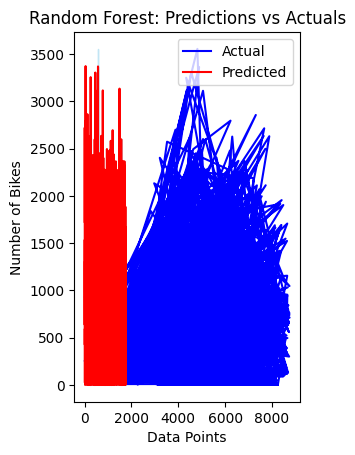

In [41]:
#Plotting Predictions vs Actuals
#Plotting for Random Forest
import numpy as np

plt.subplot(1, 2, 1)
plt.fill_between(np.arange(len(y_test)), y_test, rf_predictions, color='skyblue', alpha=0.5)
plt.plot(y_test, label='Actual', color='blue')
plt.plot(rf_predictions, label='Predicted', color='red')
plt.xlabel('Data Points')
plt.ylabel('Number of Bikes')
plt.title('Random Forest: Predictions vs Actuals')
plt.legend() 

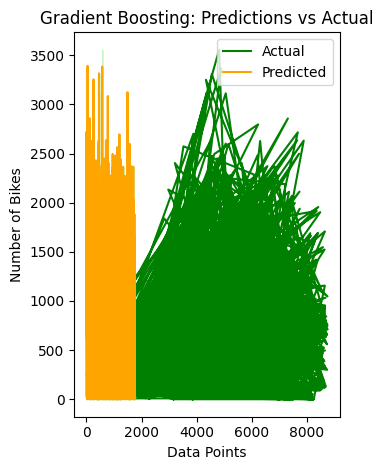

In [36]:
#Plotting for Gradient Boosting
import numpy as np

plt.subplot(1, 2, 2)

plt.fill_between(np.arange(len(y_test)), y_test, gb_predictions, color='lightgreen', alpha=0.5)
plt.plot(y_test, label='Actual', color='green')
plt.plot(gb_predictions, label='Predicted', color='orange')
plt.xlabel('Data Points')
plt.ylabel('Number of Bikes')
plt.title('Gradient Boosting: Predictions vs Actual')
plt.legend()

plt.tight_layout()
plt.show() 

Text(0, 0.5, 'Residuals')

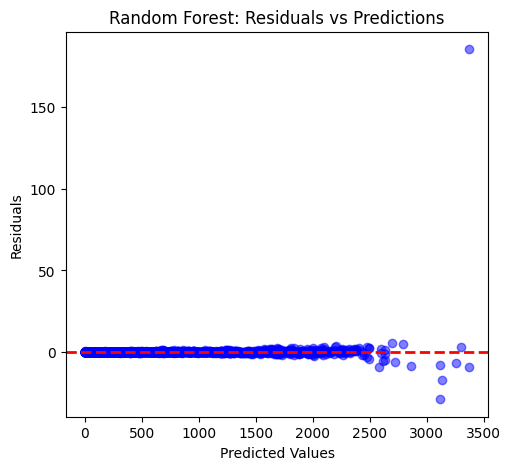

In [51]:
#Residual Analysis
#Residuals for Random Forest
# Box plot for Random Forest Residuals
plt.figure(figsize=(12, 5))

# Calculate residuals (actual - predicted)
rf_residuals = y_test - rf_predictions
gb_residuals = y_test - gb_predictions 

# Residuals vs Predictions for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(rf_predictions, rf_residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Random Forest: Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals') 